## Hometask #2

1. For your dataset get 1000+ descriptors from 2+ sources: RDKit, Pubchem, Mordred, etc. 
2. Select features from downloaded based on at least 2 selection techniques.

## Hometask #3
1. Clear the dataset obtained in the previous stages in accordance with the steps from the lecture
2. Perform data analysis (optional)
3. Choose a method and perform normalization


In [1]:
!pip install rdkit
!pip install pubchempy
!pip install mordred


[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip

[notice] A new release of pip is available: 23.3.2 -> 24.0
[notice] To update, run: python3.11 -m pip install --upgrade pip


In [231]:
import pandas as pd
import numpy as np
from rdkit import Chem
from rdkit.Chem import rdMolDescriptors
from rdkit.Chem import Descriptors
from mordred import Calculator, descriptors
from sklearn.preprocessing import MinMaxScaler
from plotly.subplots import make_subplots
import plotly.express as px
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 19 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  20000 non-null  int64  
 1   index       20000 non-null  int64  
 2   mol_id      20000 non-null  object 
 3   smiles      20000 non-null  object 
 4   A           20000 non-null  float64
 5   B           20000 non-null  float64
 6   C           20000 non-null  float64
 7   mu          20000 non-null  float64
 8   alpha       20000 non-null  float64
 9   homo        20000 non-null  float64
 10  lumo        20000 non-null  float64
 11  gap         20000 non-null  float64
 12  r2          20000 non-null  float64
 13  zpve        20000 non-null  float64
 14  u0          20000 non-null  float64
 15  u298        20000 non-null  float64
 16  h298        20000 non-null  float64
 17  g298        20000 non-null  float64
 18  cv          20000 non-null  float64
dtypes: float64(15), int64(2),

In [5]:
# Получение списка доступных дескрипторов
descriptor_names = list(rdMolDescriptors.Properties.GetAvailableProperties())
get_descriptors = rdMolDescriptors.Properties(descriptor_names)
num_descriptors = len(descriptor_names)

# Создание пустой матрицы для дескрипторов
descriptors_set = np.empty((0, num_descriptors), float)

# Получение дескрипторов
for _, row in df.iterrows():
    smiles = row['smiles']
    molecule = Chem.MolFromSmiles(smiles)

    if molecule is not None:
        descriptor = np.array(get_descriptors.ComputeProperties(molecule)).reshape((-1, num_descriptors))
        descriptors_set = np.append(descriptors_set, descriptor, axis=0)

# Создание датафрейма с дескрипторами
df_descriptors = pd.DataFrame(descriptors_set, columns=descriptor_names)

# Объединение существующего датасета с новыми дескрипторами
df_rdkit = pd.concat([df, df_descriptors], axis=1)

In [6]:
df_rdkit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 62 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Unnamed: 0                       20000 non-null  int64  
 1   index                            20000 non-null  int64  
 2   mol_id                           20000 non-null  object 
 3   smiles                           20000 non-null  object 
 4   A                                20000 non-null  float64
 5   B                                20000 non-null  float64
 6   C                                20000 non-null  float64
 7   mu                               20000 non-null  float64
 8   alpha                            20000 non-null  float64
 9   homo                             20000 non-null  float64
 10  lumo                             20000 non-null  float64
 11  gap                              20000 non-null  float64
 12  r2                

In [9]:
# Выгрузка дескрипторов
calculator = Calculator(descriptors)

molecules = []
for i in df_rdkit['smiles']:
    molecule = Chem.MolFromSmiles(i)
    if molecule is not None:
        molecules.append(molecule)

new_df = calculator.pandas(molecules)

100%|█████████████████████████████████████| 20000/20000 [43:06<00:00,  7.73it/s]


In [11]:
new_df.info()

<class 'mordred._base.pandas_module.MordredDataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1826 entries, ABC to mZagreb2
dtypes: bool(2), float64(740), int64(323), object(761)
memory usage: 278.4+ MB


In [12]:
new_df.to_csv('new_df.csv')

In [185]:
# Объединение датасета с новыми дескрипторами
df_merge = pd.concat([df_rdkit, new_df], axis=1)
df_merge

,Unnamed: 0,index,mol_id,smiles,A,B,C,mu,alpha,homo,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,0,36727,gdb_36728,C#CCCC1CCOC1,5.49143,0.66895,0.62148,1.3066,84.81,-0.2428,...,8.199464,49.466505,124.088815,5.908991,99,6,38.0,40.0,2.861111,2.250000
1,1,115927,gdb_115928,COC1CCC2OC2C1,3.54789,1.10474,0.93308,2.4615,78.34,-0.2495,...,9.206433,58.472343,128.083730,6.099225,85,9,48.0,57.0,2.583333,2.027778
2,2,768,gdb_769,c1(n[nH]nn1)N,10.01649,3.90958,2.81885,2.3205,40.14,-0.2385,...,7.788626,44.534727,85.038845,9.448761,26,2,26.0,27.0,2.111111,1.416667
3,3,109356,gdb_109357,CCC1=CCCCC1=O,2.66373,1.30548,0.95984,3.1960,86.47,-0.2348,...,8.689296,37.472182,124.088815,5.908991,86,10,40.0,44.0,3.472222,2.194444
4,4,93460,gdb_93461,CN1CCC(=N)OC1=O,2.99190,1.44371,1.01488,4.1212,71.99,-0.2579,...,8.806724,37.839725,128.058577,7.532857,84,10,42.0,46.0,4.083333,2.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,26748,gdb_26749,Cc1c(cc2n1CC2)O,3.05973,1.47401,1.01904,1.8013,81.84,-0.1740,...,9.491073,54.421558,123.068414,6.837134,78,10,50.0,61.0,3.194444,1.916667
19996,19996,4984,gdb_4985,c1cnc(c(n1)N)N,3.36848,2.44058,1.42134,1.9694,69.29,-0.2055,...,8.555837,35.908899,110.059246,7.861375,60,8,36.0,39.0,3.222222,1.861111
19997,19997,35098,gdb_35099,C#CC1C=CCC11CN1,2.29264,1.74451,1.11637,1.0929,82.46,-0.2401,...,9.471242,59.973661,119.073499,6.615194,80,10,50.0,62.0,2.673611,2.041667
19998,19998,130358,gdb_130359,c1c(noc1N=CN)N,7.42838,0.81722,0.73705,3.3354,80.23,-0.2024,...,8.442254,50.515334,126.054161,8.403611,93,7,40.0,43.0,3.472222,2.166667


In [44]:
df_merge.to_csv('df_merge.csv')

В столбцах 'mol_id' и 'smiles' закодирована информация о составе молекулы. Достаточно оставить одно молекулярное представление (удалим столбец 'mol_id'). 'gap' - таргетная переменная, поэтому важно, чтобы ее значение было не нулевым. 

In [188]:
df = df_merge.drop(columns=['Unnamed: 0', 'index', 'mol_id'])
df.dropna(subset=['gap'])
df.drop_duplicates(subset=['smiles'])
df

,smiles,A,B,C,mu,alpha,homo,lumo,gap,r2,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,C#CCCC1CCOC1,5.49143,0.66895,0.62148,1.3066,84.81,-0.2428,0.0526,0.2954,1781.5968,...,8.199464,49.466505,124.088815,5.908991,99,6,38.0,40.0,2.861111,2.250000
1,COC1CCC2OC2C1,3.54789,1.10474,0.93308,2.4615,78.34,-0.2495,0.0815,0.3311,1304.8075,...,9.206433,58.472343,128.083730,6.099225,85,9,48.0,57.0,2.583333,2.027778
2,c1(n[nH]nn1)N,10.01649,3.90958,2.81885,2.3205,40.14,-0.2385,-0.0191,0.2194,425.7517,...,7.788626,44.534727,85.038845,9.448761,26,2,26.0,27.0,2.111111,1.416667
3,CCC1=CCCCC1=O,2.66373,1.30548,0.95984,3.1960,86.47,-0.2348,-0.0435,0.1913,1296.1131,...,8.689296,37.472182,124.088815,5.908991,86,10,40.0,44.0,3.472222,2.194444
4,CN1CCC(=N)OC1=O,2.99190,1.44371,1.01488,4.1212,71.99,-0.2579,-0.0018,0.2562,1143.1487,...,8.806724,37.839725,128.058577,7.532857,84,10,42.0,46.0,4.083333,2.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Cc1c(cc2n1CC2)O,3.05973,1.47401,1.01904,1.8013,81.84,-0.1740,0.0466,0.2206,1155.1966,...,9.491073,54.421558,123.068414,6.837134,78,10,50.0,61.0,3.194444,1.916667
19996,c1cnc(c(n1)N)N,3.36848,2.44058,1.42134,1.9694,69.29,-0.2055,-0.0224,0.1831,818.9922,...,8.555837,35.908899,110.059246,7.861375,60,8,36.0,39.0,3.222222,1.861111
19997,C#CC1C=CCC11CN1,2.29264,1.74451,1.11637,1.0929,82.46,-0.2401,0.0141,0.2542,1099.4073,...,9.471242,59.973661,119.073499,6.615194,80,10,50.0,62.0,2.673611,2.041667
19998,c1c(noc1N=CN)N,7.42838,0.81722,0.73705,3.3354,80.23,-0.2024,-0.0182,0.1842,1461.8938,...,8.442254,50.515334,126.054161,8.403611,93,7,40.0,43.0,3.472222,2.166667


Перемення 'gap' - комбинация значений столбцов 'homo' и 'lumo', поэтому их можно удалить. 

In [189]:
df = df.drop(columns=['homo', 'lumo'])
df

,smiles,A,B,C,mu,alpha,gap,r2,zpve,u0,...,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb1,mZagreb2
0,C#CCCC1CCOC1,5.49143,0.66895,0.62148,1.3066,84.81,0.2954,1781.5968,0.182117,-387.063907,...,8.199464,49.466505,124.088815,5.908991,99,6,38.0,40.0,2.861111,2.250000
1,COC1CCC2OC2C1,3.54789,1.10474,0.93308,2.4615,78.34,0.3311,1304.8075,0.183520,-424.216477,...,9.206433,58.472343,128.083730,6.099225,85,9,48.0,57.0,2.583333,2.027778
2,c1(n[nH]nn1)N,10.01649,3.90958,2.81885,2.3205,40.14,0.2194,425.7517,0.064539,-313.573888,...,7.788626,44.534727,85.038845,9.448761,26,2,26.0,27.0,2.111111,1.416667
3,CCC1=CCCCC1=O,2.66373,1.30548,0.95984,3.1960,86.47,0.1913,1296.1131,0.183451,-387.144636,...,8.689296,37.472182,124.088815,5.908991,86,10,40.0,44.0,3.472222,2.194444
4,CN1CCC(=N)OC1=O,2.99190,1.44371,1.01488,4.1212,71.99,0.2562,1143.1487,0.137285,-455.205310,...,8.806724,37.839725,128.058577,7.532857,84,10,42.0,46.0,4.083333,2.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Cc1c(cc2n1CC2)O,3.05973,1.47401,1.01904,1.8013,81.84,0.2206,1155.1966,0.147997,-401.951642,...,9.491073,54.421558,123.068414,6.837134,78,10,50.0,61.0,3.194444,1.916667
19996,c1cnc(c(n1)N)N,3.36848,2.44058,1.42134,1.9694,69.29,0.1831,818.9922,0.111228,-374.964812,...,8.555837,35.908899,110.059246,7.861375,60,8,36.0,39.0,3.222222,1.861111
19997,C#CC1C=CCC11CN1,2.29264,1.74451,1.11637,1.0929,82.46,0.2542,1099.4073,0.147825,-364.758296,...,9.471242,59.973661,119.073499,6.615194,80,10,50.0,62.0,2.673611,2.041667
19998,c1c(noc1N=CN)N,7.42838,0.81722,0.73705,3.3354,80.23,0.1842,1461.8938,0.113544,-450.133938,...,8.442254,50.515334,126.054161,8.403611,93,7,40.0,43.0,3.472222,2.166667


In [190]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1883 entries, smiles to mZagreb2
dtypes: bool(2), float64(796), int64(323), object(762)
memory usage: 287.1+ MB


In [191]:
# Избавляемся от данных типа bool
for column in df.columns:
  if df[column].dtypes == 'bool':
    df[column] = df[column].astype(int)

In [192]:
# Избавляемся от данных типа object за исключением 'smiles'
rows_to_out=[]
for column in df.columns:
  if df[column].dtypes == 'object' and column not in ['smiles']:
    rows_to_out.append(column)
print(rows_to_out)

['ABC', 'ABCGG', 'VR3_A', 'ATS0s', 'ATS1s', 'ATS2s', 'ATS3s', 'ATS4s', 'ATS5s', 'ATS6s', 'ATS7s', 'ATS8s', 'AATS3dv', 'AATS4dv', 'AATS5dv', 'AATS6dv', 'AATS7dv', 'AATS8dv', 'AATS3d', 'AATS4d', 'AATS5d', 'AATS6d', 'AATS7d', 'AATS8d', 'AATS0s', 'AATS1s', 'AATS2s', 'AATS3s', 'AATS4s', 'AATS5s', 'AATS6s', 'AATS7s', 'AATS8s', 'AATS3Z', 'AATS4Z', 'AATS5Z', 'AATS6Z', 'AATS7Z', 'AATS8Z', 'AATS3m', 'AATS4m', 'AATS5m', 'AATS6m', 'AATS7m', 'AATS8m', 'AATS3v', 'AATS4v', 'AATS5v', 'AATS6v', 'AATS7v', 'AATS8v', 'AATS3se', 'AATS4se', 'AATS5se', 'AATS6se', 'AATS7se', 'AATS8se', 'AATS3pe', 'AATS4pe', 'AATS5pe', 'AATS6pe', 'AATS7pe', 'AATS8pe', 'AATS3are', 'AATS4are', 'AATS5are', 'AATS6are', 'AATS7are', 'AATS8are', 'AATS3p', 'AATS4p', 'AATS5p', 'AATS6p', 'AATS7p', 'AATS8p', 'AATS3i', 'AATS4i', 'AATS5i', 'AATS6i', 'AATS7i', 'AATS8i', 'ATSC0s', 'ATSC1s', 'ATSC2s', 'ATSC3s', 'ATSC4s', 'ATSC5s', 'ATSC6s', 'ATSC7s', 'ATSC8s', 'AATSC3c', 'AATSC4c', 'AATSC5c', 'AATSC6c', 'AATSC7c', 'AATSC8c', 'AATSC3dv', 'AATS

In [193]:
df = df.drop(columns = rows_to_out)
df

,smiles,A,B,C,mu,alpha,gap,r2,zpve,u0,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,C#CCCC1CCOC1,5.49143,0.66895,0.62148,1.3066,84.81,0.2954,1781.5968,0.182117,-387.063907,...,6.259581,8.199464,49.466505,124.088815,5.908991,99,6,38.0,40.0,2.250000
1,COC1CCC2OC2C1,3.54789,1.10474,0.93308,2.4615,78.34,0.3311,1304.8075,0.183520,-424.216477,...,7.745436,9.206433,58.472343,128.083730,6.099225,85,9,48.0,57.0,2.027778
2,c1(n[nH]nn1)N,10.01649,3.90958,2.81885,2.3205,40.14,0.2194,425.7517,0.064539,-313.573888,...,6.224558,7.788626,44.534727,85.038845,9.448761,26,2,26.0,27.0,1.416667
3,CCC1=CCCCC1=O,2.66373,1.30548,0.95984,3.1960,86.47,0.1913,1296.1131,0.183451,-387.144636,...,0.000000,8.689296,37.472182,124.088815,5.908991,86,10,40.0,44.0,2.194444
4,CN1CCC(=N)OC1=O,2.99190,1.44371,1.01488,4.1212,71.99,0.2562,1143.1487,0.137285,-455.205310,...,0.000000,8.806724,37.839725,128.058577,7.532857,84,10,42.0,46.0,2.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Cc1c(cc2n1CC2)O,3.05973,1.47401,1.01904,1.8013,81.84,0.2206,1155.1966,0.147997,-401.951642,...,7.167809,9.491073,54.421558,123.068414,6.837134,78,10,50.0,61.0,1.916667
19996,c1cnc(c(n1)N)N,3.36848,2.44058,1.42134,1.9694,69.29,0.1831,818.9922,0.111228,-374.964812,...,0.000000,8.555837,35.908899,110.059246,7.861375,60,8,36.0,39.0,1.861111
19997,C#CC1C=CCC11CN1,2.29264,1.74451,1.11637,1.0929,82.46,0.2542,1099.4073,0.147825,-364.758296,...,8.149891,9.471242,59.973661,119.073499,6.615194,80,10,50.0,62.0,2.041667
19998,c1c(noc1N=CN)N,7.42838,0.81722,0.73705,3.3354,80.23,0.1842,1461.8938,0.113544,-450.133938,...,6.529419,8.442254,50.515334,126.054161,8.403611,93,7,40.0,43.0,2.166667


In [194]:
rows_0 = df[df.isnull().any(axis=1)]
rows_0

,smiles,A,B,C,mu,alpha,gap,r2,zpve,u0,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2


In [195]:
df.to_csv('df_before_feature.csv')

### Фильтрация признаков по дисперсии

In [196]:
df = pd.read_csv('df_before_feature.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 1123 entries, Unnamed: 0 to mZagreb2
dtypes: float64(796), int64(326), object(1)
memory usage: 171.4+ MB


In [197]:
smiles = df['smiles']
df_ex = df.select_dtypes(exclude='object')

In [221]:
# Вычисление дисперсии для каждого столбца
variances = df_ex.var()

# Определение индексов столбцов с нулевой дисперсией
zero_variance_columns = variances[variances == 0].index

# Удаление столбцов с нулевой дисперсией
df_filtered = df_ex.drop(columns=zero_variance_columns)

In [222]:
df_filtered.insert(0, 'smiles', smiles)
df_filtered

,smiles,Unnamed: 0,A,B,C,mu,alpha,gap,r2,zpve,...,SRW09,SRW10,TSRW10,MW,AMW,WPath,WPol,Zagreb1,Zagreb2,mZagreb2
0,C#CCCC1CCOC1,0,5.49143,0.66895,0.62148,1.3066,84.81,0.2954,1781.5968,0.182117,...,6.259581,8.199464,49.466505,124.088815,5.908991,99,6,38.0,40.0,2.250000
1,COC1CCC2OC2C1,1,3.54789,1.10474,0.93308,2.4615,78.34,0.3311,1304.8075,0.183520,...,7.745436,9.206433,58.472343,128.083730,6.099225,85,9,48.0,57.0,2.027778
2,c1(n[nH]nn1)N,2,10.01649,3.90958,2.81885,2.3205,40.14,0.2194,425.7517,0.064539,...,6.224558,7.788626,44.534727,85.038845,9.448761,26,2,26.0,27.0,1.416667
3,CCC1=CCCCC1=O,3,2.66373,1.30548,0.95984,3.1960,86.47,0.1913,1296.1131,0.183451,...,0.000000,8.689296,37.472182,124.088815,5.908991,86,10,40.0,44.0,2.194444
4,CN1CCC(=N)OC1=O,4,2.99190,1.44371,1.01488,4.1212,71.99,0.2562,1143.1487,0.137285,...,0.000000,8.806724,37.839725,128.058577,7.532857,84,10,42.0,46.0,2.027778
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Cc1c(cc2n1CC2)O,19995,3.05973,1.47401,1.01904,1.8013,81.84,0.2206,1155.1966,0.147997,...,7.167809,9.491073,54.421558,123.068414,6.837134,78,10,50.0,61.0,1.916667
19996,c1cnc(c(n1)N)N,19996,3.36848,2.44058,1.42134,1.9694,69.29,0.1831,818.9922,0.111228,...,0.000000,8.555837,35.908899,110.059246,7.861375,60,8,36.0,39.0,1.861111
19997,C#CC1C=CCC11CN1,19997,2.29264,1.74451,1.11637,1.0929,82.46,0.2542,1099.4073,0.147825,...,8.149891,9.471242,59.973661,119.073499,6.615194,80,10,50.0,62.0,2.041667
19998,c1c(noc1N=CN)N,19998,7.42838,0.81722,0.73705,3.3354,80.23,0.1842,1461.8938,0.113544,...,6.529419,8.442254,50.515334,126.054161,8.403611,93,7,40.0,43.0,2.166667


### Корреляция Пирсона

In [223]:
smiles = df['smiles']
df_ex = df_filtered.select_dtypes(exclude='object')
corr_matrix = df_ex.corr()

In [224]:
high_corr_features = set() #Пустое множество для хранения сильно коррелирующих признаков

for i in range(len(corr_matrix.columns)):
    for j in range(i):
        if abs(corr_matrix.iloc[i, j]) > 0.75:
            high_corr_features.add(corr_matrix.columns[i])

data_cleaned = df_ex.drop(high_corr_features, axis=1)
data_cleaned

,Unnamed: 0,A,B,mu,alpha,gap,r2,zpve,u0,cv,...,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,GGI6,GGI7,JGI4,Radius
0,0,5.49143,0.66895,1.3066,84.81,0.2954,1781.5968,0.182117,-387.063907,34.713,...,0,0,0,0,0.125000,0.080000,0.055556,0.0,0.025000,3
1,1,3.54789,1.10474,2.4615,78.34,0.3311,1304.8075,0.183520,-424.216477,32.728,...,0,1,0,0,0.276111,0.142500,0.000000,0.0,0.069028,3
2,2,10.01649,3.90958,2.3205,40.14,0.2194,425.7517,0.064539,-313.573888,16.955,...,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.000000,2
3,3,2.66373,1.30548,3.1960,86.47,0.1913,1296.1131,0.183451,-387.144636,33.917,...,0,0,0,0,0.262222,0.062500,0.000000,0.0,0.052444,3
4,4,2.99190,1.44371,4.1212,71.99,0.2562,1143.1487,0.137285,-455.205310,30.401,...,0,0,0,0,0.413333,0.000000,0.000000,0.0,0.103333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,19995,3.05973,1.47401,1.8013,81.84,0.2206,1155.1966,0.147997,-401.951642,31.994,...,0,1,0,0,0.236111,0.000000,0.000000,0.0,0.078704,3
19996,19996,3.36848,2.44058,1.9694,69.29,0.1831,818.9922,0.111228,-374.964812,25.888,...,0,0,0,0,0.222222,0.000000,0.000000,0.0,0.111111,3
19997,19997,2.29264,1.74451,1.0929,82.46,0.2542,1099.4073,0.147825,-364.758296,31.757,...,0,0,0,0,0.250000,0.000000,0.000000,0.0,0.062500,2
19998,19998,7.42838,0.81722,3.3354,80.23,0.1842,1461.8938,0.113544,-450.133938,31.352,...,0,0,0,0,0.205000,0.135556,0.000000,0.0,0.041000,3


In [225]:
data_cleaned.insert(0, 'smiles', smiles)
data_cleaned

,smiles,Unnamed: 0,A,B,mu,alpha,gap,r2,zpve,u0,...,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,GGI6,GGI7,JGI4,Radius
0,C#CCCC1CCOC1,0,5.49143,0.66895,1.3066,84.81,0.2954,1781.5968,0.182117,-387.063907,...,0,0,0,0,0.125000,0.080000,0.055556,0.0,0.025000,3
1,COC1CCC2OC2C1,1,3.54789,1.10474,2.4615,78.34,0.3311,1304.8075,0.183520,-424.216477,...,0,1,0,0,0.276111,0.142500,0.000000,0.0,0.069028,3
2,c1(n[nH]nn1)N,2,10.01649,3.90958,2.3205,40.14,0.2194,425.7517,0.064539,-313.573888,...,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.000000,2
3,CCC1=CCCCC1=O,3,2.66373,1.30548,3.1960,86.47,0.1913,1296.1131,0.183451,-387.144636,...,0,0,0,0,0.262222,0.062500,0.000000,0.0,0.052444,3
4,CN1CCC(=N)OC1=O,4,2.99190,1.44371,4.1212,71.99,0.2562,1143.1487,0.137285,-455.205310,...,0,0,0,0,0.413333,0.000000,0.000000,0.0,0.103333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Cc1c(cc2n1CC2)O,19995,3.05973,1.47401,1.8013,81.84,0.2206,1155.1966,0.147997,-401.951642,...,0,1,0,0,0.236111,0.000000,0.000000,0.0,0.078704,3
19996,c1cnc(c(n1)N)N,19996,3.36848,2.44058,1.9694,69.29,0.1831,818.9922,0.111228,-374.964812,...,0,0,0,0,0.222222,0.000000,0.000000,0.0,0.111111,3
19997,C#CC1C=CCC11CN1,19997,2.29264,1.74451,1.0929,82.46,0.2542,1099.4073,0.147825,-364.758296,...,0,0,0,0,0.250000,0.000000,0.000000,0.0,0.062500,2
19998,c1c(noc1N=CN)N,19998,7.42838,0.81722,3.3354,80.23,0.1842,1461.8938,0.113544,-450.133938,...,0,0,0,0,0.205000,0.135556,0.000000,0.0,0.041000,3


In [226]:
data_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Columns: 176 entries, smiles to Radius
dtypes: float64(120), int64(55), object(1)
memory usage: 26.9+ MB


In [227]:
data_cleaned.to_csv('data_cleaned.csv')

### Анализ данных

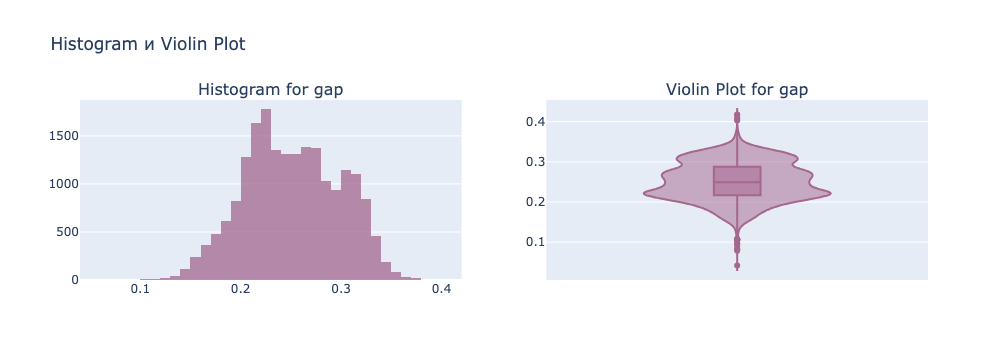

In [228]:
colors = ['#a5678e','#e8b7d4', '#beb7d9', '#7eabd4', '#31539d']

#Построим график распределения целевой переменной
fig = make_subplots(rows=1, cols=2, subplot_titles=['Histogram for gap', 'Violin Plot for gap'])

# Histogram
hist_fig = px.histogram(df, x="gap", nbins = 60,
                 color_discrete_sequence = colors,
                 opacity = 0.75)

fig.add_trace(hist_fig['data'][0], row=1, col=1) # Adding a graph indicating the location

# Violin plot
violin_fig = px.violin(df, y="gap", color_discrete_sequence = colors, box = True)
fig.add_trace(violin_fig['data'][0], row=1, col=2) # Adding a graph indicating the location

# Setting up the layout
fig.update_layout(showlegend=False, title_text="Histogram и Violin Plot")

# Graph display
fig.show()

Распределение данных похоже на нормальное, однако наблюдаются выбросы. Удалим их с использованием межквартильного размаха (IQR)

In [229]:
def outliers_iqr(data_cleaned, threshold=1.5):
    quartile_1, quartile_3 = np.percentile(data_cleaned, [25, 75])
    iqr = quartile_3 - quartile_1
    lower_bound = quartile_1 - (threshold * iqr)
    upper_bound = quartile_3 + (threshold * iqr)
    outliers = np.where((data_cleaned < lower_bound) | (data_cleaned > upper_bound))[0]
    return outliers

outliers = outliers_iqr(data_cleaned['gap'])
print("Индексы выбросов:", outliers)
print("Значения выбросов:", [data_cleaned['gap'][i] for i in outliers])

Индексы выбросов: [ 1663  3413  3644  3816  5478  6647  6786  7803  9113  9371 10104 12788
 13811 15072 15444 15666 16682 17123 17441 19577]
Значения выбросов: [0.042, 0.4107, 0.1083, 0.0787, 0.4177, 0.1066, 0.0955, 0.403, 0.417, 0.0823, 0.4056, 0.0821, 0.1046, 0.1063, 0.1052, 0.1065, 0.0972, 0.1065, 0.0901, 0.1062]


In [230]:
data_cleaned = data_cleaned.drop(outliers)
data_cleaned

,smiles,Unnamed: 0,A,B,mu,alpha,gap,r2,zpve,u0,...,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,GGI6,GGI7,JGI4,Radius
0,C#CCCC1CCOC1,0,5.49143,0.66895,1.3066,84.81,0.2954,1781.5968,0.182117,-387.063907,...,0,0,0,0,0.125000,0.080000,0.055556,0.0,0.025000,3
1,COC1CCC2OC2C1,1,3.54789,1.10474,2.4615,78.34,0.3311,1304.8075,0.183520,-424.216477,...,0,1,0,0,0.276111,0.142500,0.000000,0.0,0.069028,3
2,c1(n[nH]nn1)N,2,10.01649,3.90958,2.3205,40.14,0.2194,425.7517,0.064539,-313.573888,...,0,0,0,0,0.000000,0.000000,0.000000,0.0,0.000000,2
3,CCC1=CCCCC1=O,3,2.66373,1.30548,3.1960,86.47,0.1913,1296.1131,0.183451,-387.144636,...,0,0,0,0,0.262222,0.062500,0.000000,0.0,0.052444,3
4,CN1CCC(=N)OC1=O,4,2.99190,1.44371,4.1212,71.99,0.2562,1143.1487,0.137285,-455.205310,...,0,0,0,0,0.413333,0.000000,0.000000,0.0,0.103333,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19995,Cc1c(cc2n1CC2)O,19995,3.05973,1.47401,1.8013,81.84,0.2206,1155.1966,0.147997,-401.951642,...,0,1,0,0,0.236111,0.000000,0.000000,0.0,0.078704,3
19996,c1cnc(c(n1)N)N,19996,3.36848,2.44058,1.9694,69.29,0.1831,818.9922,0.111228,-374.964812,...,0,0,0,0,0.222222,0.000000,0.000000,0.0,0.111111,3
19997,C#CC1C=CCC11CN1,19997,2.29264,1.74451,1.0929,82.46,0.2542,1099.4073,0.147825,-364.758296,...,0,0,0,0,0.250000,0.000000,0.000000,0.0,0.062500,2
19998,c1c(noc1N=CN)N,19998,7.42838,0.81722,3.3354,80.23,0.1842,1461.8938,0.113544,-450.133938,...,0,0,0,0,0.205000,0.135556,0.000000,0.0,0.041000,3


Теперь, когда распределение данных не имеет явных выбросов, можно воспользоваться методом Min-Max нормализации.

### Нормализация

In [235]:
data_cleaned.to_csv('data_cleaned.csv')

In [232]:
smiles = data_cleaned['smiles']
gap = data_cleaned['gap']
data = data_cleaned.drop(columns = ['gap', 'smiles', 'Unnamed: 0'])

scaler = MinMaxScaler()
data_norm = scaler.fit_transform(data)

In [233]:
data_encoded = pd.DataFrame(data_norm, columns=data.columns)
data_encoded.insert(0, 'smiles', smiles)
data_encoded.insert(1, 'gap', gap)
data_encoded

,smiles,gap,A,B,mu,alpha,r2,zpve,u0,cv,...,n6FRing,n7FRing,n8FRing,n9FaRing,GGI4,GGI5,GGI6,GGI7,JGI4,Radius
0,C#CCCC1CCOC1,0.2954,0.000009,0.000726,0.074453,0.751556,0.548280,0.644550,0.430014,0.716682,...,0.0,0.0,0.0,0.0,0.173077,0.280702,0.5,0.0,0.112500,0.75
1,COC1CCC2OC2C1,0.3311,0.000006,0.001722,0.140261,0.689612,0.399968,0.650014,0.361848,0.667133,...,0.0,1.0,0.0,0.0,0.382308,0.500000,0.0,0.0,0.310625,0.75
2,c1(n[nH]nn1)N,0.2194,0.000016,0.008132,0.132227,0.323887,0.126526,0.186680,0.564851,0.273408,...,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.000000,0.50
3,CCC1=CCCCC1=O,0.1913,0.000004,0.002180,0.182114,0.767449,0.397264,0.649745,0.429866,0.696812,...,0.0,0.0,0.0,0.0,0.363077,0.219298,0.0,0.0,0.236000,0.75
4,CN1CCC(=N)OC1=O,0.2562,0.000005,0.002496,0.234834,0.628818,0.349682,0.469966,0.304990,0.609046,...,0.0,0.0,0.0,0.0,0.572308,0.000000,0.0,0.0,0.465000,0.75
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19975,CC(CC1CO1)C=O,0.2261,0.000005,0.002566,0.102642,0.723121,0.353430,0.511681,0.402698,0.648811,...,0.0,1.0,0.0,0.0,0.326923,0.000000,0.0,0.0,0.354167,0.75
19976,FC1=NC(=O)N=NO1,0.2697,0.000005,0.004775,0.112220,0.602968,0.248849,0.368495,0.452213,0.496393,...,0.0,0.0,0.0,0.0,0.307692,0.000000,0.0,0.0,0.500000,0.75
19977,c1c(c(c([nH]1)N)CO)N,0.2135,0.000004,0.003184,0.062276,0.729057,0.336076,0.511011,0.470939,0.642895,...,0.0,0.0,0.0,0.0,0.346154,0.000000,0.0,0.0,0.281250,0.50
19978,CN(C=O)C1CC1O,0.2649,0.000012,0.001065,0.190058,0.707707,0.448832,0.377514,0.314295,0.632785,...,0.0,0.0,0.0,0.0,0.283846,0.475634,0.0,0.0,0.184500,0.75


In [234]:
data_encoded.to_csv('data_encoded.csv')